In [23]:
#import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
from category_encoders import WOEEncoder
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import BaggingRegressor

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

rng = np.random.RandomState(42)

import warnings
warnings.filterwarnings("ignore")

import gc; gc.enable()

In [24]:
#read in all of the data and combine them into one dataframe called train

In [25]:
rtrain = pd.read_csv('m_race_hist.csv')

In [26]:
itrain = pd.read_csv('m_horse_info.csv')

In [27]:
rtrain['Track'] = rtrain['Track'].apply(lambda x: x.lower())

In [28]:
rtrain = rtrain.drop(rtrain[rtrain['Track'] == 'awt'].index)

In [29]:
train = rtrain.join(itrain.set_index('hname'), on='hname')

In [30]:
#create a target variable

In [31]:
target = train['Pla.']

In [32]:
train.drop('Pla.', axis = 1, inplace = True)

In [33]:
target = target.astype(int)

In [35]:
#Target encode all of the categorical variables

In [39]:
cate = [c for c in X.columns.tolist() if c not in ['Act.  Wt.','x1','x2','x3','x4','x5','x6','x7','x8',
                                                   'x9','x10','x11','x12','x13','x14','x15','x16','x17','x18',
                                                   'x19','x22','x23','x24','x25','x26','x27','x28',
                                                   'x29','x30','x31','x32','x33',
                                                    'Declar.  Horse Wt.', 'Race  Class',
                                                    'Dist.','Dr','Pla.']]






In [40]:
ce_target_encoder = ce.TargetEncoder(cols = cate, smoothing=.3)
ce_target_encoder.fit(X, target)

TargetEncoder(cols=['Course', 'Jockey', 'Trainer', 'hname', 'x20', 'x21'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=0.3, verbose=0)

In [41]:
X = ce_target_encoder.transform(X)

[14:39:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


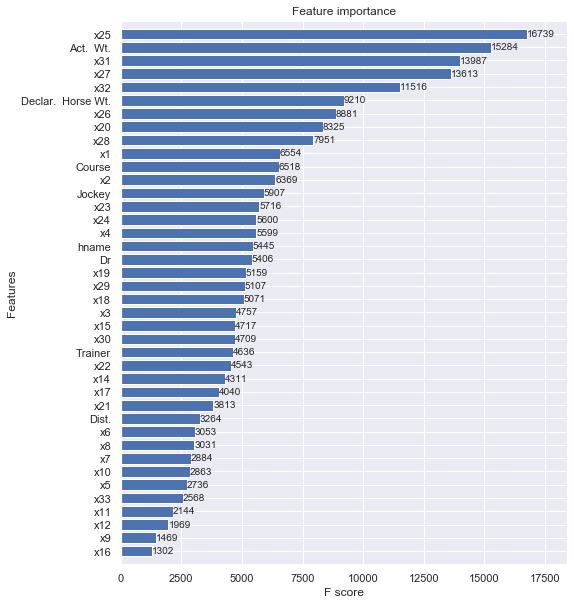

In [42]:
clf = xgb.XGBRegressor(max_depth=11, n_estimators=300, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=.1, n_jobs = -1)
clf.fit(X, y)
# plot the important features #
fig, ax = plt.subplots(figsize=(8,10))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [104]:
scores = cross_val_score(clf, X, y, cv=5, scoring='r2')
print(scores.mean(), "+/-", scores.std())

[14:14:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.5932369695274832 +/- 0.027311853394261627
